In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:

# Load the dataset with the appropriate encoding
df = pd.read_csv('laptop_price.csv', encoding='latin1')

In [3]:

# Data Exploration
print(df.head())
print(df.info())
print(df.describe())

   laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   

In [4]:
# Data Cleaning (if necessary)
# Assuming some cleaning is required, e.g., handling missing values
df.dropna(inplace=True)


In [5]:
# Feature Engineering
# Assuming some feature engineering, e.g., encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

In [11]:
# Inspect the column names of the DataFrame
print(df.columns)


Index(['laptop_ID', 'Inches', 'Price_euros', 'Company_Apple', 'Company_Asus',
       'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google',
       'Company_HP',
       ...
       'Weight_4.2kg', 'Weight_4.33kg', 'Weight_4.36kg', 'Weight_4.3kg',
       'Weight_4.42kg', 'Weight_4.4kg', 'Weight_4.5kg', 'Weight_4.6kg',
       'Weight_4.7kg', 'Weight_4kg'],
      dtype='object', length=1140)


In [12]:
# Splitting the data into training and testing sets
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [14]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
461 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    valida

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [15]:
# Best Hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [16]:

# Training the Random Forest model with the best hyperparameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=200)

In [17]:
# Making predictions
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)

In [18]:
# Model Evaluation
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Training MSE:", mse_train)
print("Training R^2:", r2_train)
print("Testing MSE:", mse_test)
print("Testing R^2:", r2_test)

Training MSE: 0.03273349328215006
Training R^2: 0.9999999322566933
Testing MSE: 80310.87858301416
Testing R^2: 0.8418848501369078


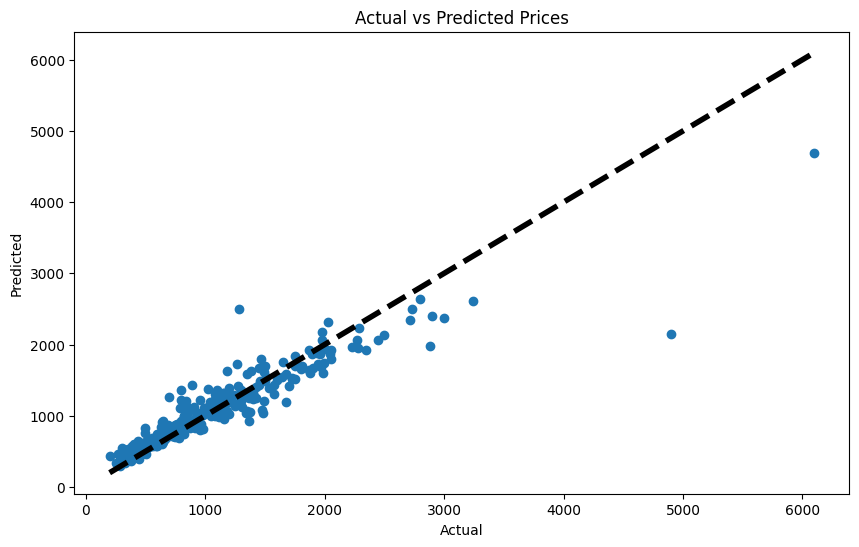

In [19]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()

In [21]:

# Model Deployment (Pseudo-code for actual deployment)
# Save the model to a file
import joblib 
joblib.dump(best_rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [23]:
# Load the model and make predictions on new data
model = joblib.load('random_forest_model.pkl')

# Replace with actual feature names and values
new_data = pd.DataFrame({
    'Inches': [15.6],
    'Company_Apple': [0], 'Company_Asus': [0], 'Company_Chuwi': [0], 'Company_Dell': [1],
    'Company_Fujitsu': [0], 'Company_Google': [0], 'Company_HP': [0],  # Add other company dummies as needed
    # Include all necessary features similarly
    'Weight_1.25kg': [1], 'Weight_2.5kg': [0]  # Include weight categories as needed
    # Add all other required features
})

# Ensure new_data has the same columns as the training data
new_data = new_data.reindex(columns=X_train.columns, fill_value=0)

# Make prediction
prediction = model.predict(new_data)
print("Predicted Price:", prediction)


Predicted Price: [1081.69395]
